In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
summarize,
poly)
from sklearn.metrics import mean_squared_error
import seaborn as sns

from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import \
(cross_validate,
KFold,
ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

# load data
train_df = pd.read_csv("train.csv")

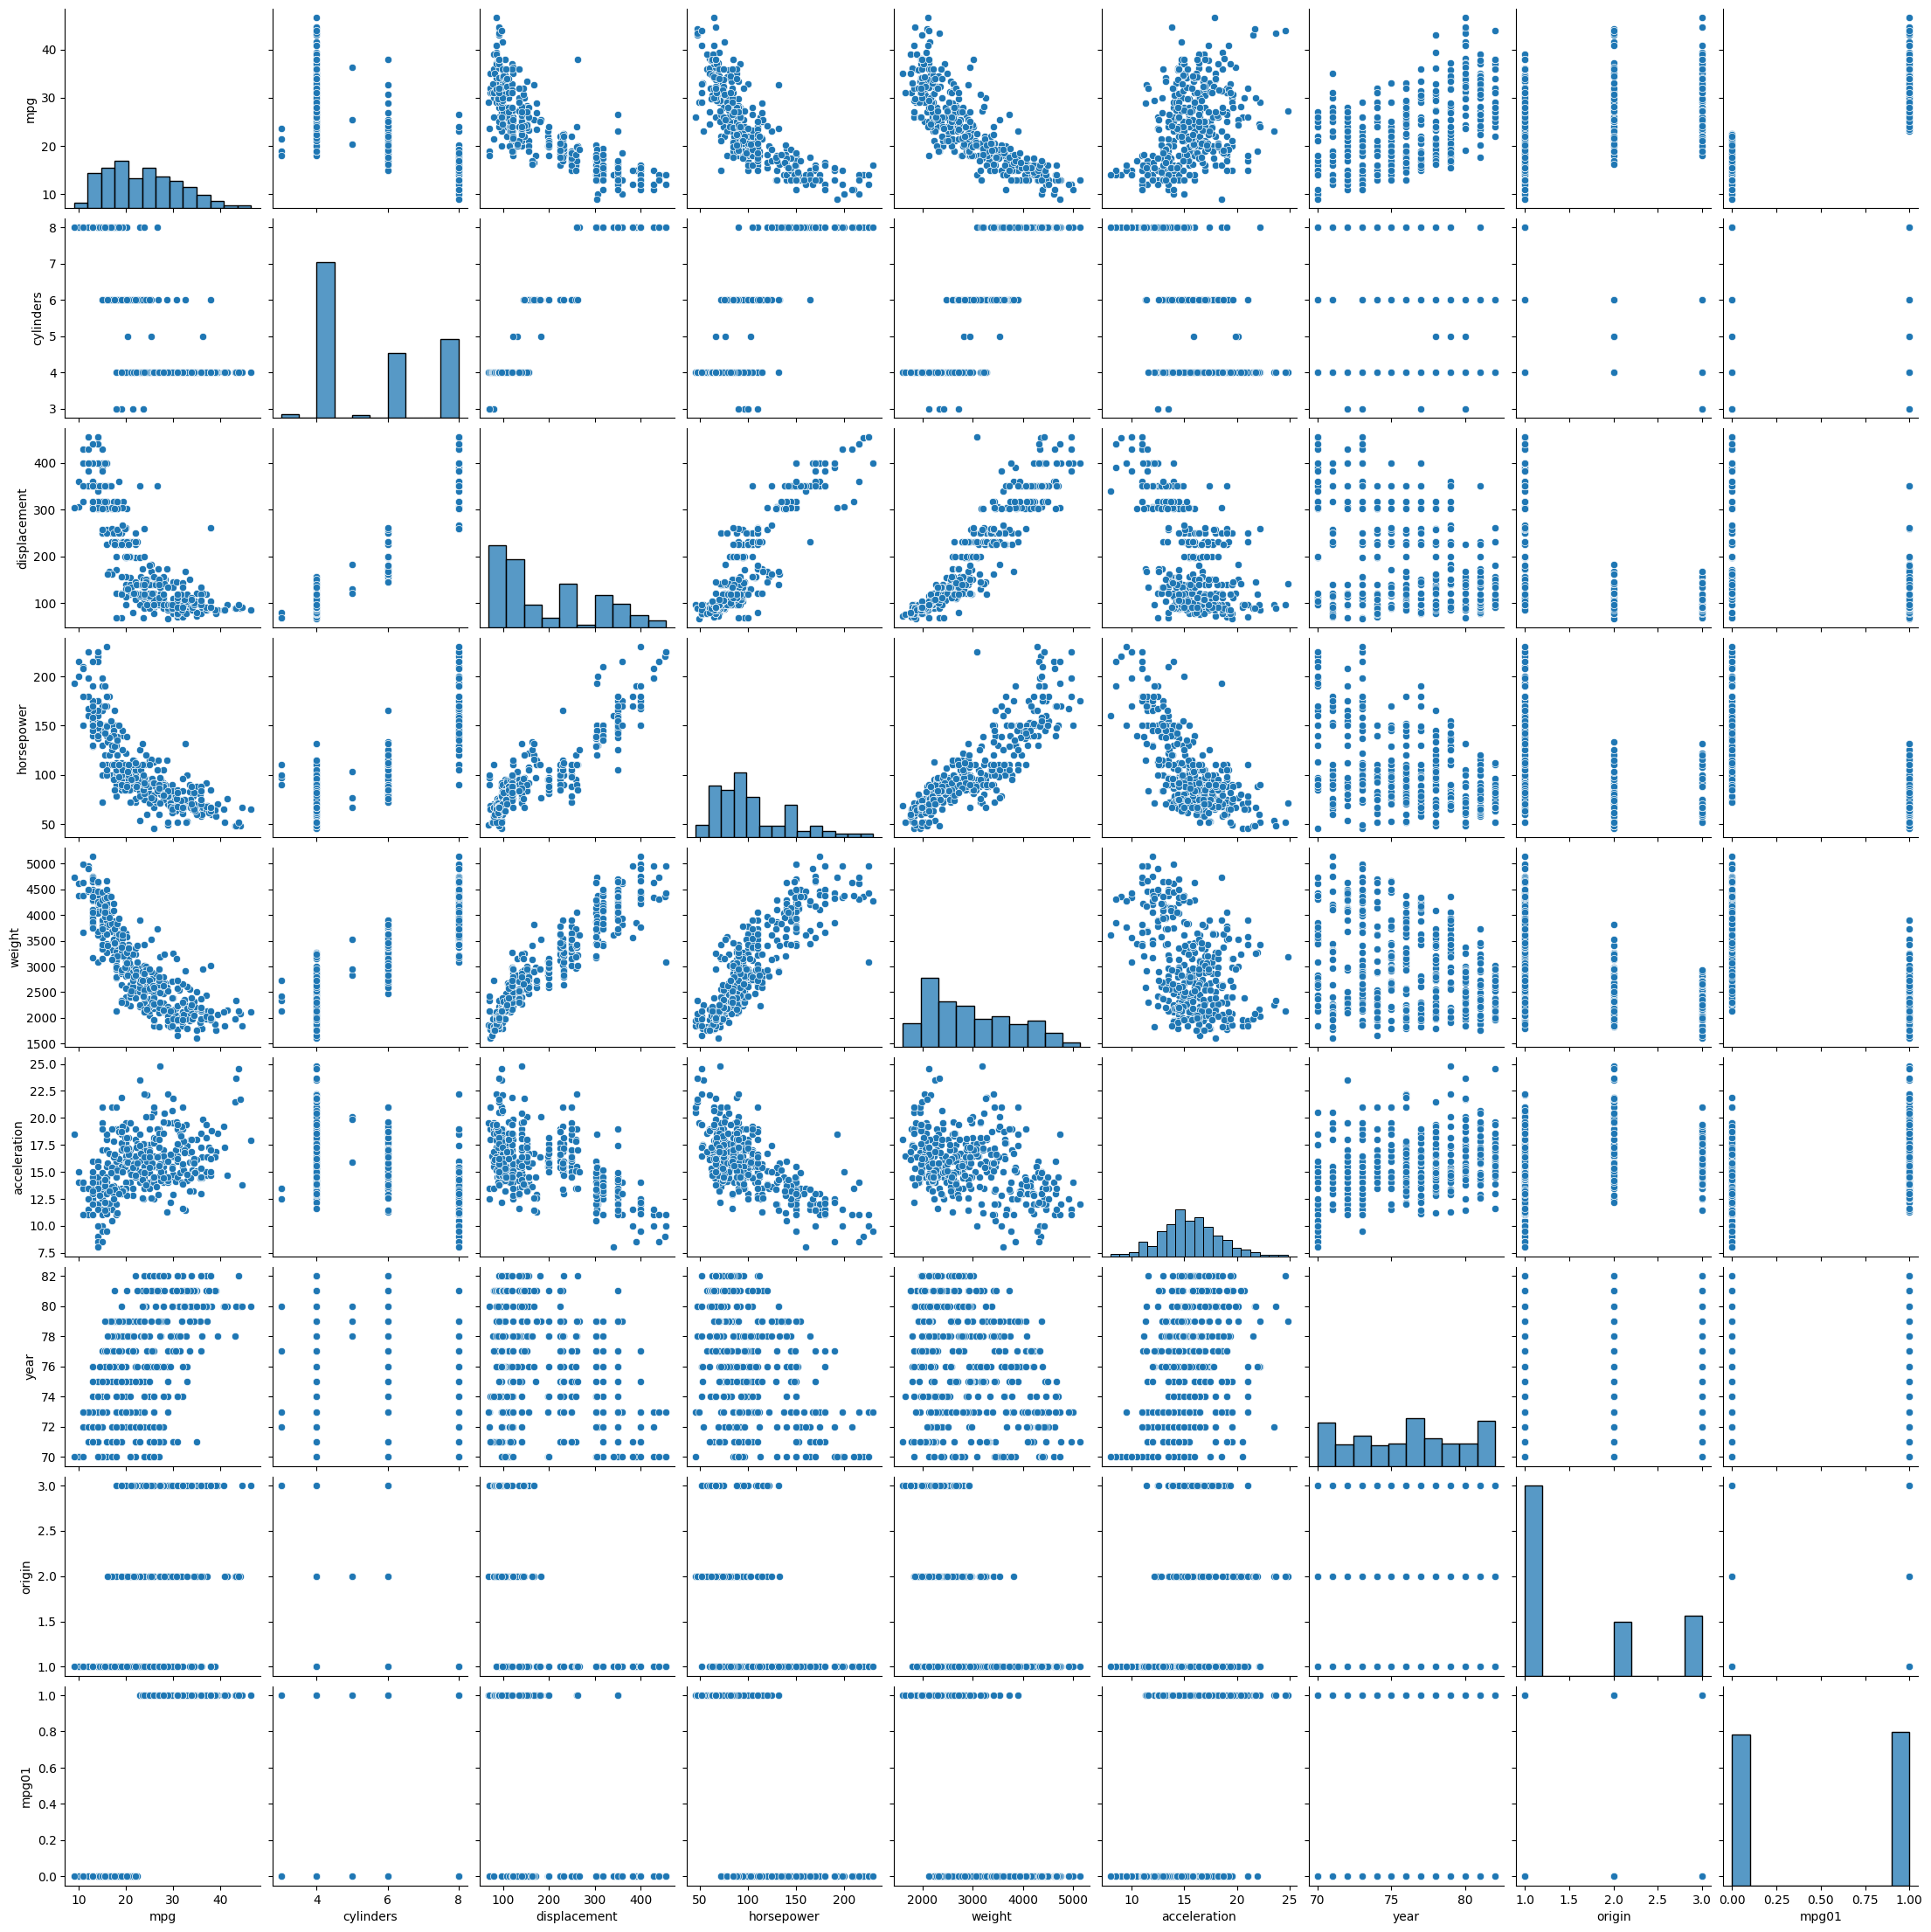

In [2]:
train_df.columns
sns.pairplot(train_df)

In [3]:

#select variables/features for model
#only using 2 variables, you can use more if you want
feature_columns = ['displacement','horsepower','weight','acceleration','year']
#create model matrix with features
model_matrix = MS(feature_columns)

#fit transform the training df
X_train = model_matrix.fit_transform(train_df)

#set the output target (predicting mpg)
target_column = 'mpg'
y_train = train_df[target_column]

#define the model, train and target
model1 = sm.OLS(y_train, X_train)

#fit the data to the model defn
fitted_model1 = model1.fit()

#print results
summarize(fitted_model1)

,coef,std err,t,P>|t|
intercept,-15.4535,4.651,-3.323,0.001
displacement,0.0035,0.005,0.653,0.514
horsepower,-0.0014,0.014,-0.101,0.919
weight,-0.0069,0.001,-10.401,0.000
acceleration,0.0807,0.102,0.795,0.427
year,0.7589,0.052,14.539,0.000


In [4]:
y_train_pred = fitted_model1.predict(X_train)
train_df["mpg_pred"] = y_train_pred
rmse = mean_squared_error(train_df["mpg"], train_df["mpg_pred"])
rmse

11.645519598825313

In [11]:
#load the data with no mpg
test_df = pd.read_csv("test.csv")

#transport the input using model matrix
X_test = model_matrix.transform(test_df)

#use fitted model to predict mpg
y_test_pred = fitted_model1.predict(X_test)

#set column to mpg
test_df["mpg"] = y_test_pred
y_test = test_df['mpg']
np.mean((y_test - y_train_pred)**2)

np.float64(0.413923674986772)

In [ ]:
#export csv for kaggle
test_df[["ID","mpg"]].to_csv('predicted.csv',index=False)